# Features Engineering

<h2>Table of Contents</h2>

- [Features Engineering](#features-engineering)
  - [1. Fast Fourier Transform Visualization](#1.-fast-fourier-transform-visualization)
    - [1.1. Focused State](#1.1.-focused-state)
    - [1.2. Unfocused State](#1.2.-unfocused-state)
    - [1.3. Drownsy state](#1.3.-drownsy-state)
    - [1.4. Spectrogram Plot](#1.4.-spectrogram-plot)
  - [2. Features Extraction](#2.-features-extraction)
    - [2.1. Sliding Window Illustrate](#2.1.-sliding-window-illustrate)
    - [2.2. Sliding Window Method](#2.2.-sliding-window-method)
    - [2.3. Epoch method (if necessary)](#2.3.-epoch-method-(if-necessary))



## 1. Fast Fourier Transform Visualization

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("data/extracted_eeg15.csv")
df.head()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,state
0,0,36.308042,-55.186421,152.140934,-69.699336,-33.371978,7.011785,3.676519,-36.256532,-7.410987,13.321748,-12.999812,10.527336,18.369719,-26.431018,focused
1,1,145.275957,-222.151700,613.645042,-281.397540,-134.994174,29.029020,15.308817,-145.544705,-29.492744,53.302692,-51.218925,42.033961,72.757687,-106.553388,focused
2,2,221.156883,-342.470203,948.443954,-435.638306,-209.620124,47.306369,24.710285,-224.045032,-46.279805,81.361800,-73.960070,63.947824,109.184230,-164.097805,focused
3,3,174.543454,-277.631682,768.868855,-354.526413,-171.274459,41.546387,20.535896,-182.844315,-42.460191,64.876410,-47.334591,50.743829,85.960672,-131.003854,focused
4,4,130.972434,-211.498239,578.466515,-268.812212,-129.841300,28.959749,13.057790,-141.738067,-38.558418,48.789203,-21.136371,38.098960,68.718020,-95.478064,focused


In [6]:
df.describe()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
count,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000,443972.000000
mean,221985.500000,-0.000474,0.000254,0.000264,-0.000489,-0.000301,0.000357,0.000878,0.000812,0.000293,-0.000492,-0.000210,-0.000466,-0.000433,0.000007
std,128163.821194,5.971115,5.789471,9.580238,6.345000,5.736325,7.184243,8.862893,10.177508,8.781786,5.496789,6.715437,5.447905,5.644232,10.627613
min,0.000000,-333.198537,-342.470203,-345.877259,-435.638306,-331.658436,-86.345335,-133.566758,-224.045032,-272.703568,-322.266576,-636.440961,-332.748491,-333.645798,-220.221984
25%,110992.750000,-3.437857,-3.340820,-4.601394,-3.544239,-3.224365,-4.221609,-5.136229,-5.667328,-4.730517,-3.154651,-3.276947,-3.117195,-3.240347,-4.595818
50%,221985.500000,-0.029470,-0.001993,0.002495,0.015273,0.010740,0.048600,0.049457,0.069562,-0.009202,-0.021418,-0.018482,-0.024031,0.005189,-0.035168
75%,332978.250000,3.400954,3.344064,4.623114,3.545748,3.230481,4.264691,5.198373,5.762395,4.768521,3.117404,3.246473,3.080821,3.229116,4.555180
max,443971.000000,221.156883,343.302853,948.443954,141.838762,107.872518,260.156752,329.346813,348.731149,368.233946,107.825538,286.522466,107.653541,109.184230,1123.877264


In [7]:
# setting
fs = 128

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot FFT for a specific epoch
def viz_fft(df, channel, state, start_idx, fs=128, epoch_length=128):
    # Get data for the specific channel and state
    data = df[(df['state'] == state)][channel].values

    # Check if there is enough data to get an epoch
    if start_idx + epoch_length > len(data):
        print(f"Not enough data for epoch starting at position {start_idx}.")
        return

    # Get data for the epoch
    epoch_data = data[start_idx:start_idx + epoch_length]

    # Check for empty data
    if len(epoch_data) == 0:
        print(f"Empty data for state '{state}' from position {start_idx}.")
        return

    # Apply FFT
    fft_data = np.fft.fft(epoch_data)
    freqs = np.fft.fftfreq(len(epoch_data), d=1/fs)

    # Get positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_fft_data = np.abs(fft_data[freqs >= 0])

    # Plot the graph
    plt.plot(positive_freqs, positive_fft_data)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of {channel}, State: {state}, Position: {start_idx}')
    plt.grid(True)

# Function to plot n consecutive epochs for a specific state
def viz_nepochs_state(df, channel, num_epochs, state='focused', fs=128, epoch_length=128):
    plt.figure(figsize=(12, num_epochs * 3))
    current_idx = 0  # Start from the first sample
    epochs_plotted = 0

    # Get data for the specific state
    state_data = df[df['state'] == state]
    total_samples = len(state_data)

    while epochs_plotted < num_epochs and current_idx + epoch_length <= total_samples:
        plt.subplot(num_epochs, 1, epochs_plotted + 1)
        viz_fft(df, channel, state, current_idx, fs, epoch_length)
        epochs_plotted += 1
        current_idx += epoch_length  # Move to the next epoch

    if epochs_plotted == 0:
        print(f"No data to display for state '{state}'.")
    else:
        plt.tight_layout()
        plt.show()

### 1.1. Focused State

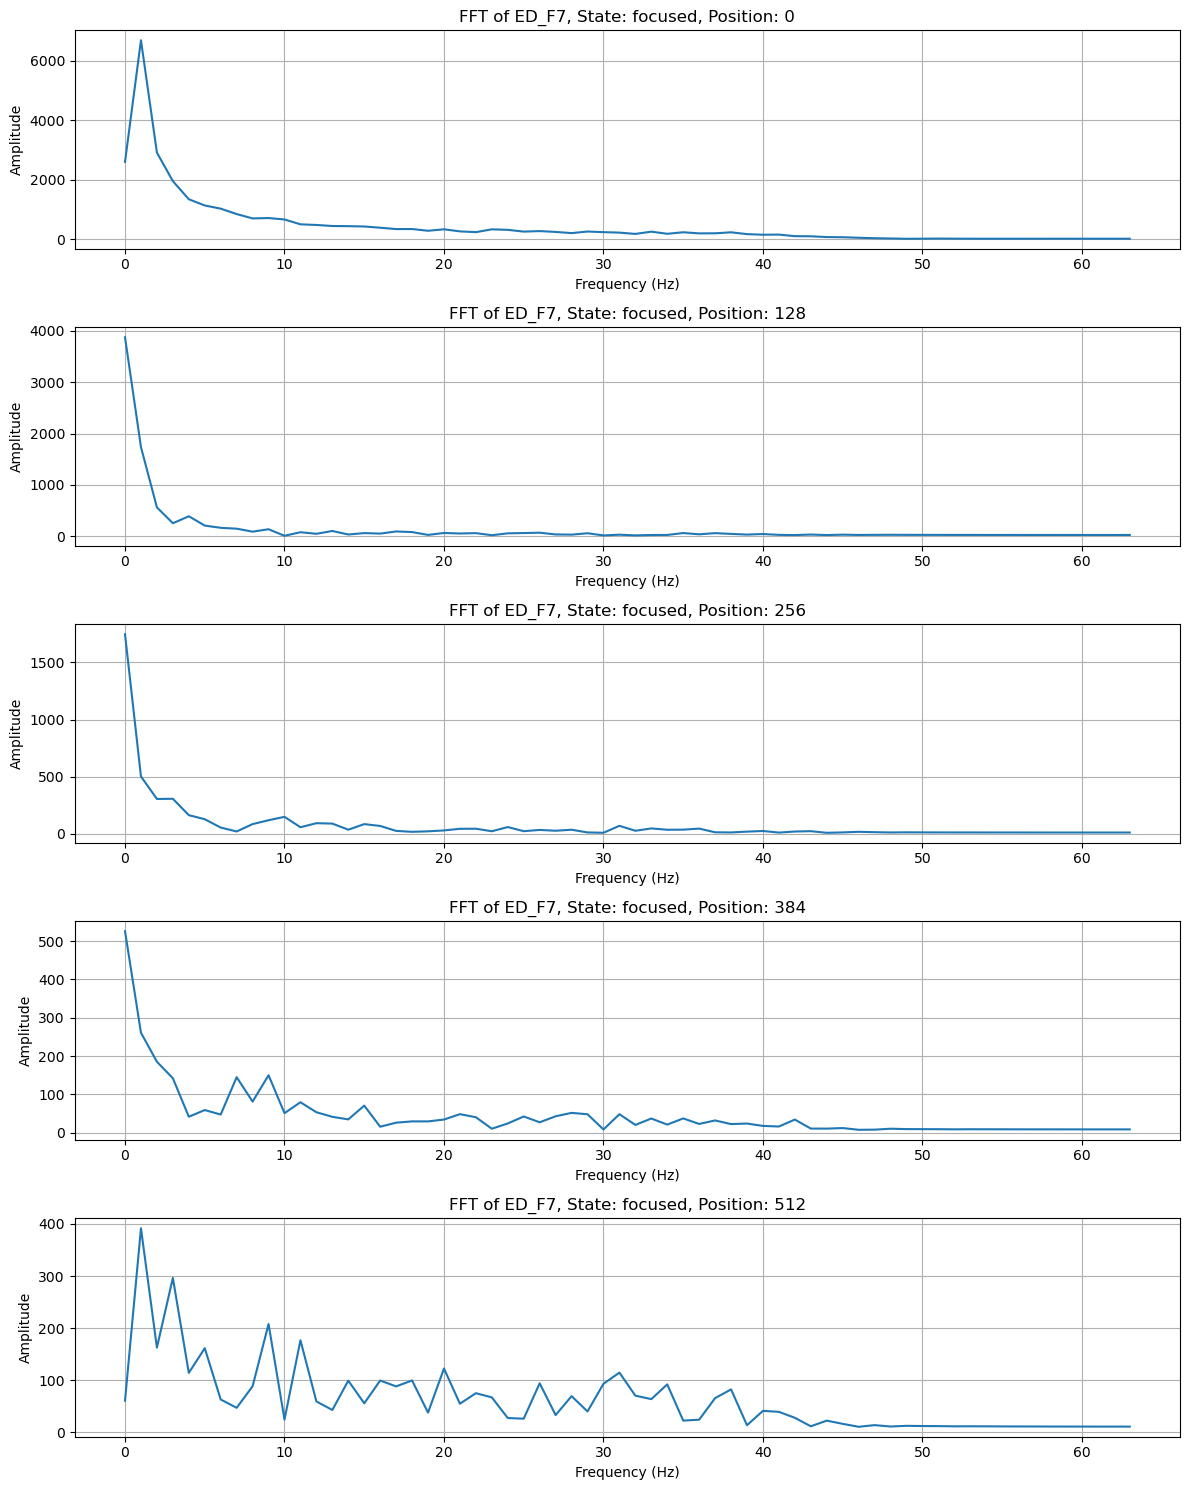

In [8]:
# Test with channel ED_F7 with 3 epochs, focused state
channel = 'ED_F7'
num_epochs = 5

viz_nepochs_state(df, channel, num_epochs, state='focused')

### 1.2. Unfocused State

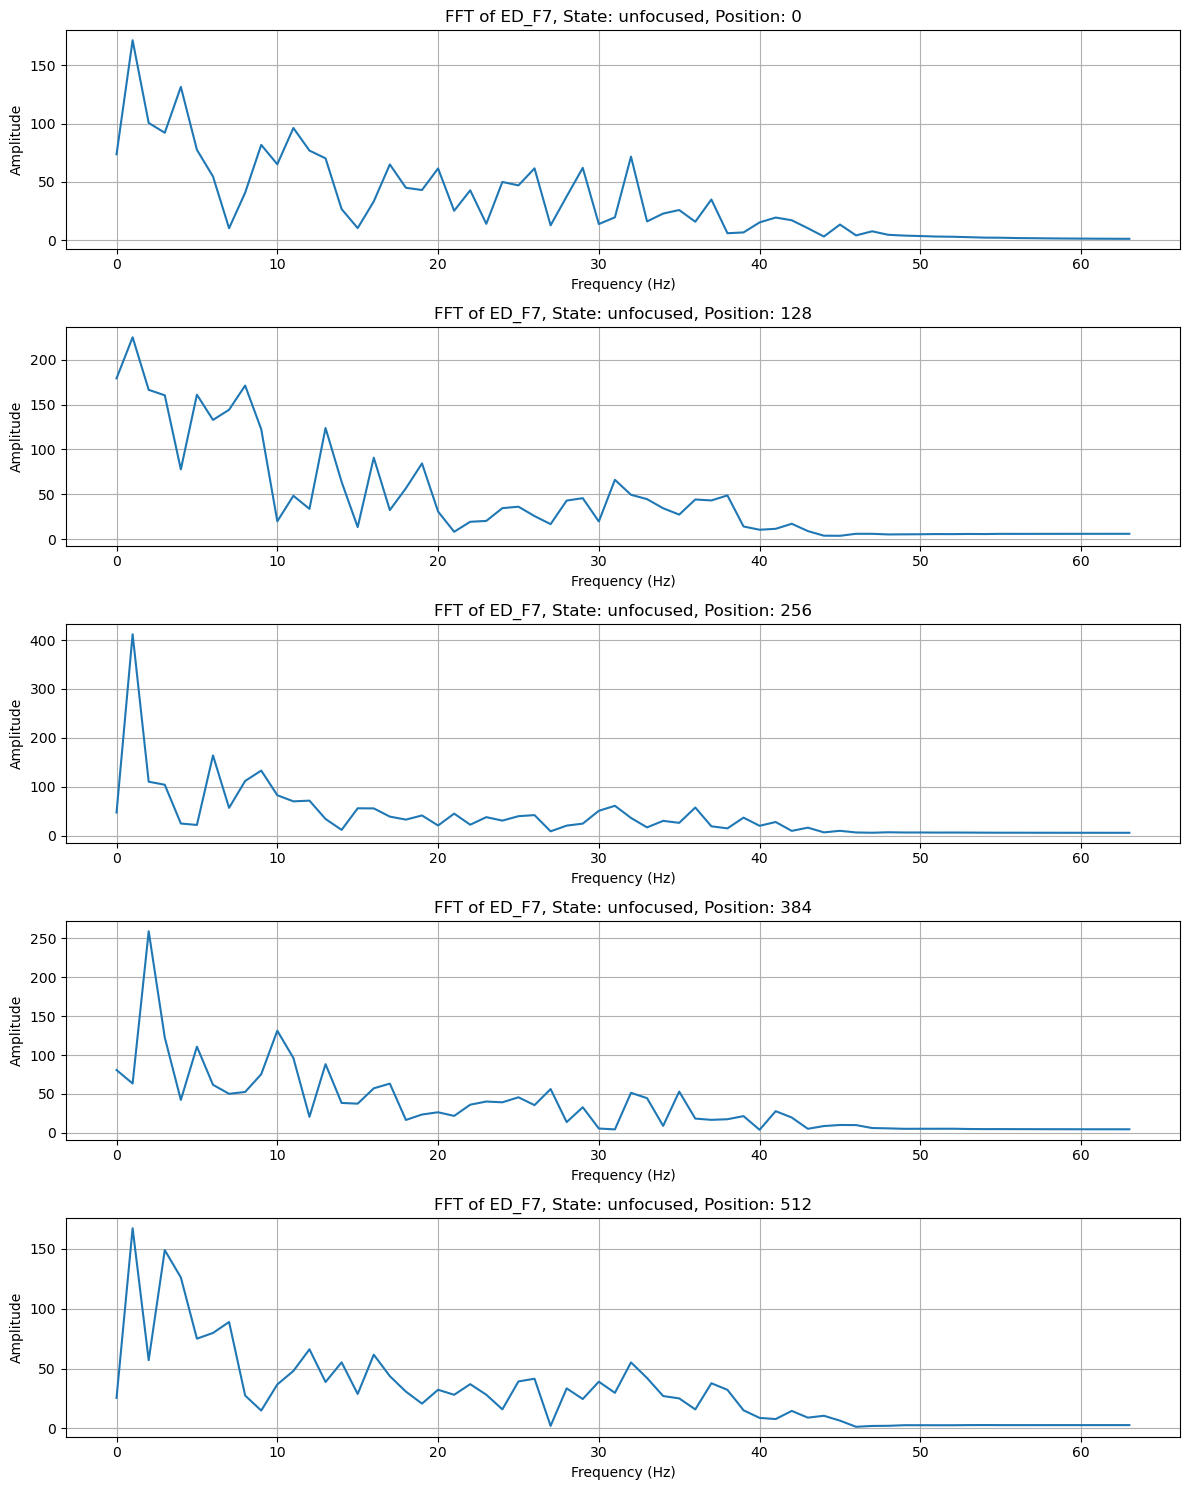

In [10]:
# Test with channel ED_F7 with 3 epochs, unfocused state
viz_nepochs_state(df, channel, num_epochs, state='unfocused')

### 1.3. Drownsy state

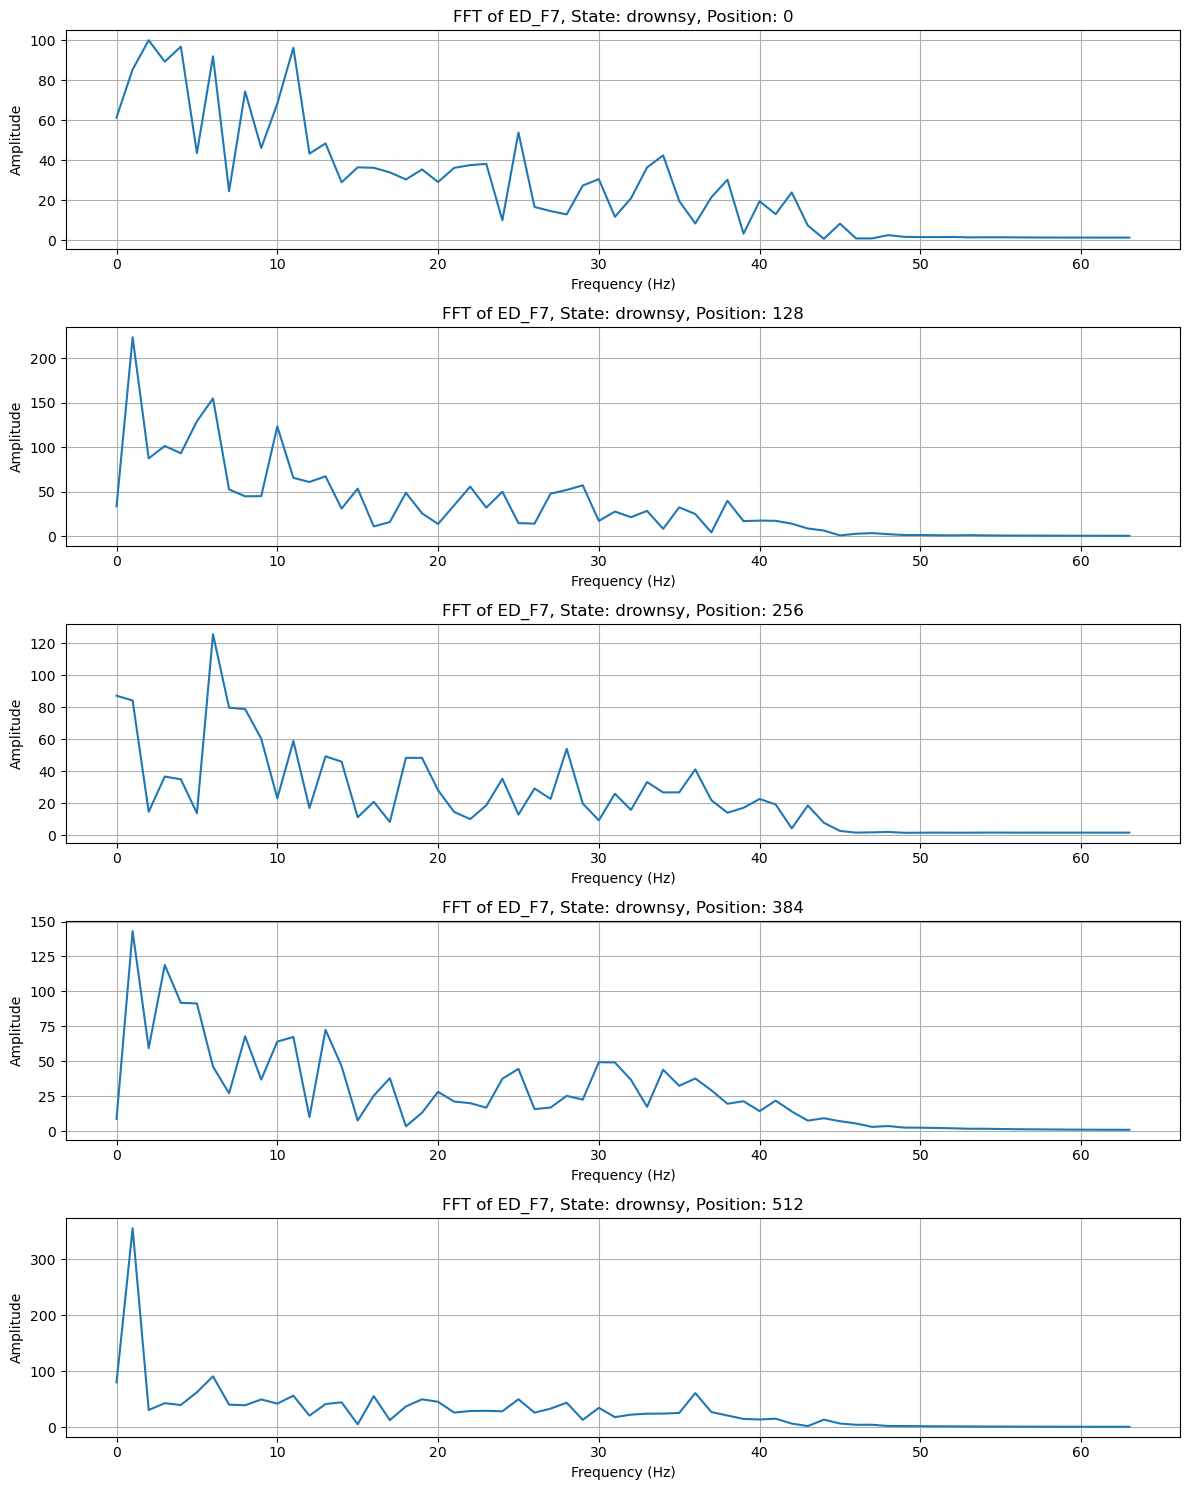

In [11]:
# Test with channel ED_F7 with 3 epochs, drownsy state

viz_nepochs_state(df, channel, num_epochs, state='drownsy')

### 1.4. Spectrogram Plot

In [12]:
# # Tính độ lệch chuẩn cho từng kênh
# std_devs = df.drop(columns=['t', 'state']).std()  # Bỏ cột 't' và tính std cho các kênh
# bad_channels_std = std_devs[std_devs < 0.01]  # Ngưỡng tín hiệu phẳng là 0.01

# print("Các kênh xấu (tín hiệu phẳng):", bad_channels_std.index.tolist())

In [13]:
# # Tính ma trận tương quan
# correlation_matrix = df.drop(columns=['t', 'state']).corr()

# # Xác định kênh có tương quan trung bình thấp hơn ngưỡng (ví dụ: 0.1)
# bad_channels_corr = []
# correlation_threshold = 0.1

# for col in correlation_matrix.columns:
#     avg_corr = correlation_matrix[col].mean()
#     if avg_corr < correlation_threshold:
#         bad_channels_corr.append(col)

# print("Các kênh xấu (tương quan thấp):", bad_channels_corr)

Creating RawArray with float64 data, n_channels=14, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  1734.262 secs
Ready.


/tmp/ipykernel_59452/1314567871.py:29: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(custom_montage, on_missing='ignore')


<Info | 8 non-empty values
 bads: []
 ch_names: ED_AF3, ED_F7, ED_F3, ED_FC5, ED_T7, ED_P7, ED_O1, ED_O2, ED_P8, ...
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>
Using qt as 2D backend.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


/tmp/ipykernel_59452/1314567871.py:43: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 15.8s.


/tmp/ipykernel_59452/1314567871.py:43: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (7.8) and smallest (9.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


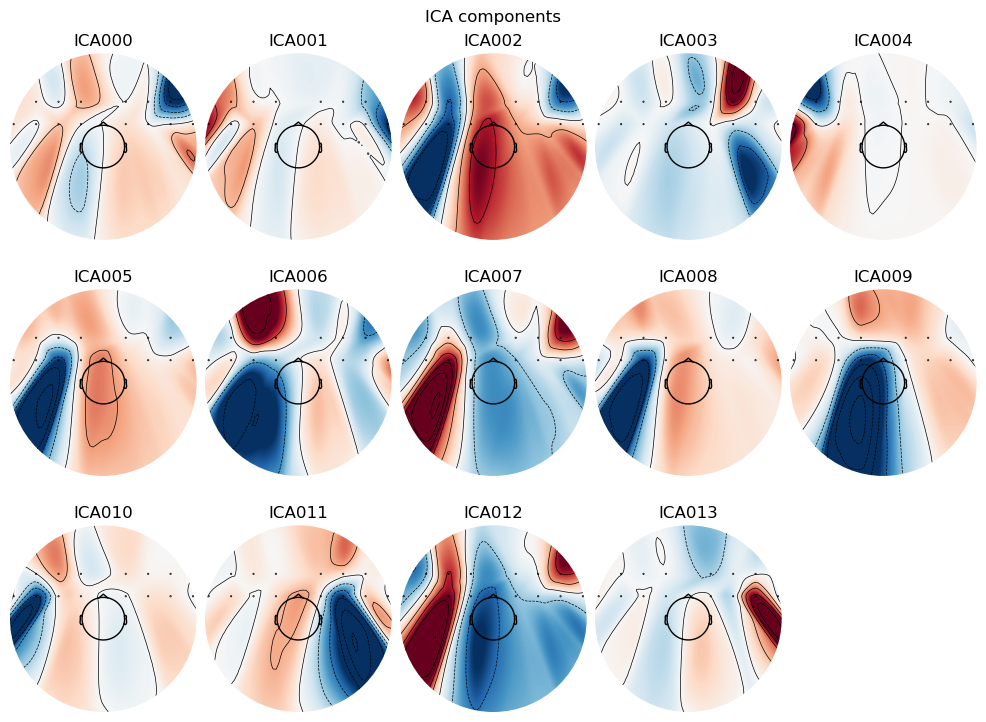

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Channels marked as bad:
none


Channels marked as bad:
none


In [ ]:
import mne
import numpy as np
import pandas as pd

# Đọc file CSV
df = pd.read_csv("data/raw15.csv")

# Lấy danh sách các kênh (bỏ cột thời gian 't')
channel_names = list(df.columns[1:-1])  # Bỏ cột 't'
channel_types = ['eeg'] * len(channel_names)  # Gán tất cả các kênh là 'eeg'

# Chuyển đổi dữ liệu sang định dạng numpy
data = df.iloc[:, 1:-1].values.T  # Chuyển đổi thành (kênh, thời gian)

# Tạo thông tin cho dữ liệu (sampling_rate giả định là 256 Hz, điều chỉnh nếu cần)
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types=channel_types)

# Create a custom montage
montage = mne.channels.make_standard_montage('standard_1020')

# Define the positions of your specific channels
custom_montage = mne.channels.make_dig_montage({
	'ED_AF3': [-0.1, 0.1, 0], 'ED_F7': [-0.2, 0.1, 0], 'ED_F3': [-0.1, 0.2, 0], 'ED_FC5': [-0.2, 0.2, 0],
	'ED_T7': [-0.3, 0.1, 0], 'ED_P7': [-0.3, 0.2, 0], 'ED_O1': [-0.4, 0.1, 0], 'ED_O2': [0.4, 0.1, 0],
	'ED_P8': [0.3, 0.2, 0], 'ED_T8': [0.3, 0.1, 0], 'ED_FC6': [0.2, 0.2, 0], 'ED_F4': [0.1, 0.2, 0],
	'ED_F8': [0.2, 0.1, 0], 'ED_AF4': [0.1, 0.1, 0]
})

info.set_montage(custom_montage, on_missing='ignore')

# Chuyển dữ liệu thành RawArray
raw = mne.io.RawArray(data, info)

# Kiểm tra dữ liệu
print(raw.info)
raw.plot(n_channels=len(channel_names), duration=5, show_scrollbars=False)


from mne.preprocessing import ICA

# Áp dụng ICA
ica = ICA(n_components=len(channel_names), random_state=97, max_iter=1000)
ica.fit(raw)

# Vẽ các thành phần ICA để kiểm tra
ica.plot_components()


# Giả sử thành phần 0 và 1 là nhiễu (bạn cần quan sát đồ thị để quyết định)
ica.exclude = [0, 1]  # Đánh dấu các thành phần cần loại bỏ

# Áp dụng ICA để loại bỏ thành phần nhiễu
raw_cleaned = ica.apply(raw)

# Vẽ tín hiệu sạch để kiểm tra
raw_cleaned.plot(n_channels=len(channel_names), duration=5, show_scrollbars=False)


# Chuyển dữ liệu sạch về numpy array
cleaned_data = raw_cleaned.get_data().T  # Định dạng (thời gian, kênh)

# Chuyển sang DataFrame
df_cleaned = pd.DataFrame(cleaned_data, columns=channel_names)

# Thêm cột thời gian trở lại nếu cần
df_cleaned.insert(0, 't', df['t'])
df_cleaned.insert(0, 'state', df['state'])
# Lưu file CSV
# df_cleaned.to_csv("data/cleaned_eeg15_with_ica.csv", index=False)
# print("Dữ liệu sạch đã được lưu.")


In [17]:
# useful channel
useful_channels = ['ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4']
# then useful_columns is 
useful_columns = ['t', 'ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4', 'state']

df = df[useful_columns]

In [16]:
from scipy.signal import spectrogram

def plot_spectrogram(df, channel, fs=128, nperseg=256, noverlap=128):
    data = df[channel].values

    # Compute the spectrogram
    f, t, Sxx = spectrogram(data, fs, nperseg=nperseg, noverlap=noverlap)

    # Plot the spectrogram
    # plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(f'Spectrogram of {channel}')

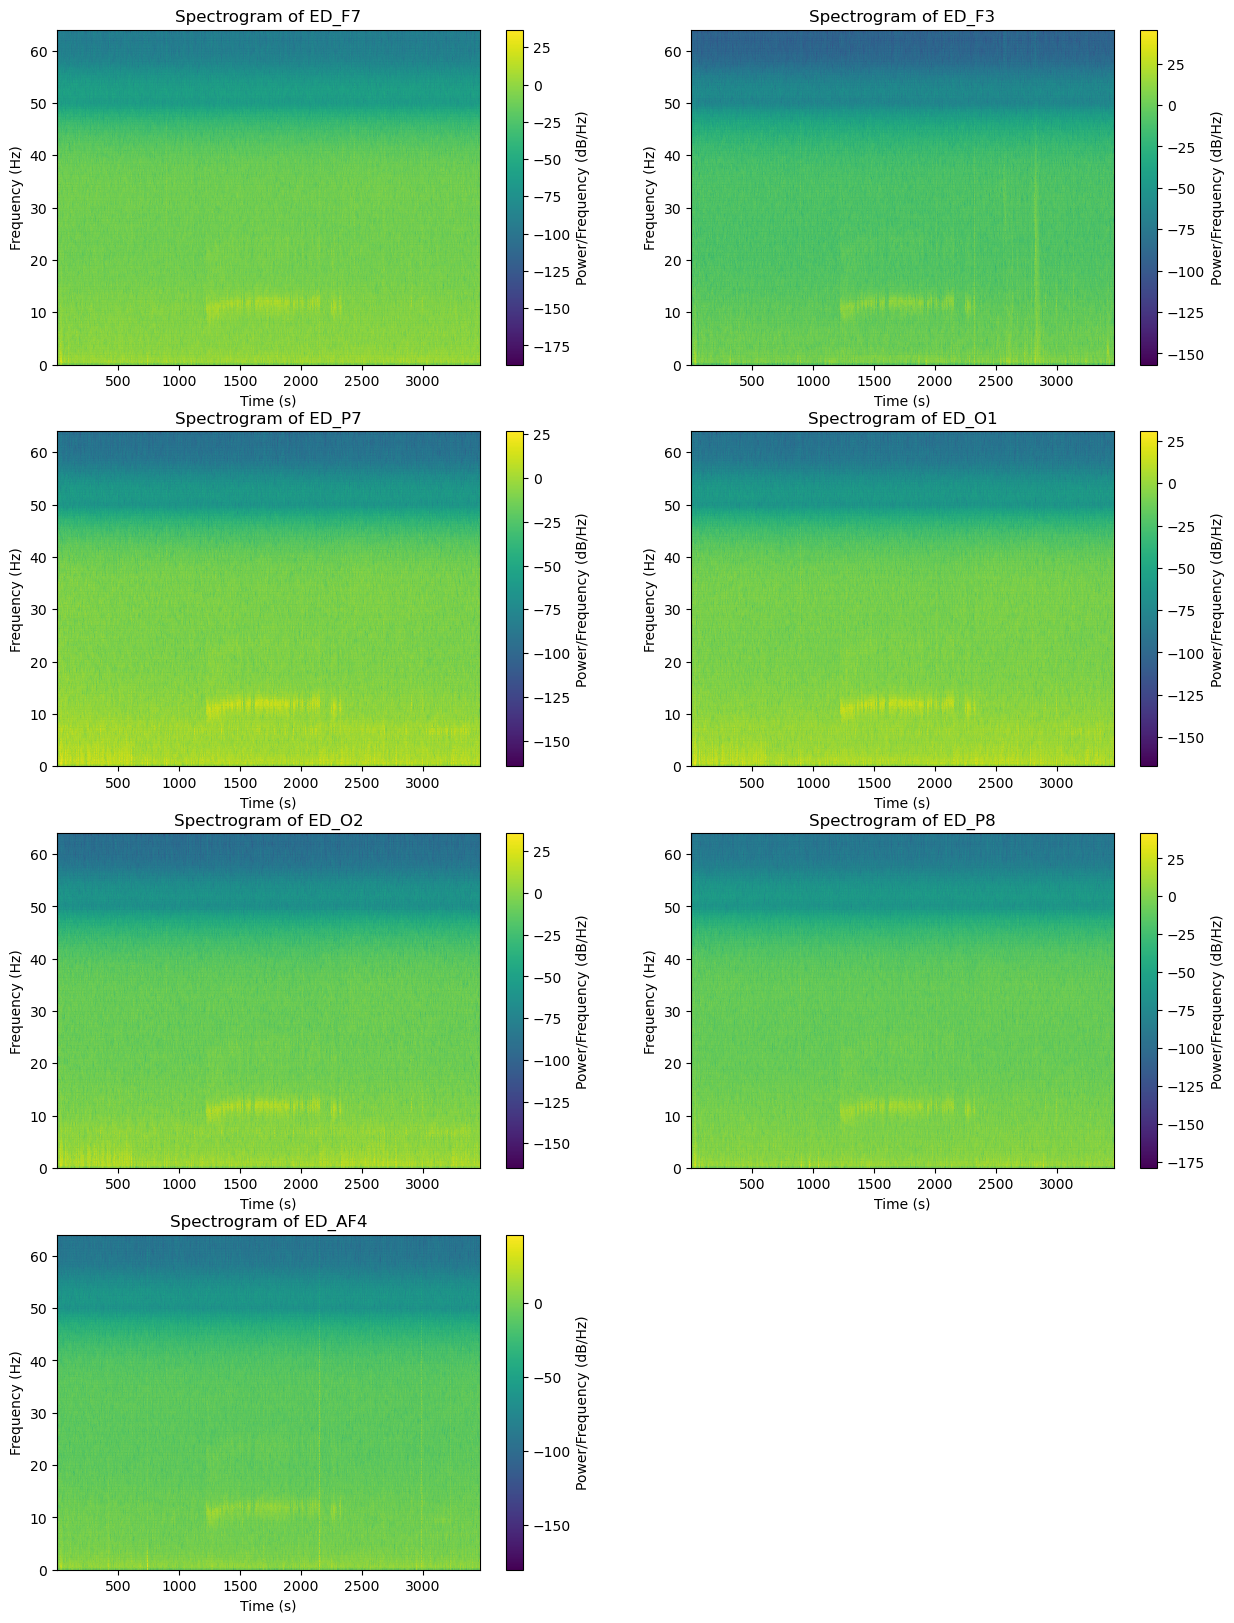

In [17]:
plt.figure(figsize=(15, 20))
ncols = 2
nrows = int(np.ceil(len(useful_channels) / ncols))

for idx, channel in enumerate(useful_channels):
    plt.subplot(nrows, ncols, idx+1)
    plot_spectrogram(df, channel)

plt.show()

## 2. Features Extraction

1. **Power spectral density (PSD):**
   - Power in specific frequency bands (delta, theta, alpha, beta, gamma). This feature is calculated using FFT to compute the power spectrum at different frequencies within each signal window.
   
2. **Relative Power:**
   - The ratio of power in each frequency band to the total power. This is important information to compare the energy distribution between frequency bands, which can help detect changes in brain activity.

3. **Peak Frequency:**
   - The frequency at the point with the highest amplitude in the FFT spectrum. This is an important indicator to identify prominent frequencies in the EEG signal, helping to distinguish different brain activity states.

4. **Band Ratios:**
   - The ratio between frequency bands, such as the beta/alpha ratio, is a useful feature to analyze changes in brain activities related to alertness or relaxation.

5. **Descriptive Statistics:**
   - Includes basic statistical parameters such as:
     - **Mean:** This feature helps understand the average level of the EEG signal within a time window.
     - **Standard Deviation:** Measures the variability of the EEG signal, helping to distinguish between stable and unstable states.
     - **Median:** Provides information about the distribution of the EEG signal, less affected by outliers.
     - **Min/Max:** Identifies the extreme values in the EEG signal.
   
6. **Spectral Entropy:**
   - Measures the uncertainty in the power spectrum of the EEG signal. High entropy indicates instability in brain activity, while low entropy indicates a more stable state.

7. **Skewness:**
   - Measures the asymmetry of the EEG signal distribution compared to a normal distribution. High skewness may indicate imbalance in the data, potentially related to changes in brain states.

8. **Kurtosis:**
   - Measures the sharpness of the EEG signal distribution. High kurtosis may indicate the signal has many sharp peaks, which can reflect strong changes in brain activity.

9. **Wavelet Features:**
   - Uses wavelet transform (here, 'db4' wavelet) to analyze the EEG signal at different levels of detail. These features include:
     - **Energy of detail coefficients:** Measures the energy of the detail coefficients in the wavelet transform, indicating the level of high-frequency variations in the signal.
     - **Relative energy:** The ratio of the energy of the detail coefficients to the total energy in the signal, helping to understand the energy distribution across different frequencies.

### 2.1. Sliding Window Illustrate

In [18]:
import numpy as np

def rolling_average(data, window_length, step_size):
    averages = []
    positions = []
    for start in range(0, len(data) - window_length + 1, step_size):
        end = start + window_length
        window_data = data[start:end]
        avg = np.mean(window_data)
        averages.append(avg)
        positions.append((start, end))
    return averages, positions

# Example Data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Average Sliding Window
window_length = 4
step_size = 2

averages, positions = rolling_average(data, window_length, step_size)

# In kết quả
for i, (avg, pos) in enumerate(zip(averages, positions)):
    print(f"Window {i+1}: Pos {pos}, Values: {data[pos[0]:pos[1]]}, Avg: {avg}")

Window 1: Pos (0, 4), Values: [1 2 3 4], Avg: 2.5
Window 2: Pos (2, 6), Values: [3 4 5 6], Avg: 4.5
Window 3: Pos (4, 8), Values: [5 6 7 8], Avg: 6.5
Window 4: Pos (6, 10), Values: [ 7  8  9 10], Avg: 8.5


### 2.2. Features Extraction 

In [18]:
import numpy as np
import pandas as pd
import pywt  # Library for Wavelet transform

def compute_statistics(positive_fft_data):
    """Compute statistical measures for each channel."""
    mean_vals = np.mean(positive_fft_data, axis=0)
    std_vals = np.std(positive_fft_data, axis=0)
    median_vals = np.median(positive_fft_data, axis=0)
    min_vals = np.min(positive_fft_data, axis=0)
    max_vals = np.max(positive_fft_data, axis=0)
    return mean_vals, std_vals, median_vals, min_vals, max_vals

def compute_band_powers(power_spectrum, freqs_in_band):
    """Compute band powers for each frequency band and each channel."""
    band_powers = {}
    for band_name, band_mask in freqs_in_band.items():
        band_power = np.sum(power_spectrum[band_mask, :], axis=0)
        band_powers[band_name] = band_power
    return band_powers

def compute_relative_powers(band_powers):
    """Compute relative powers for each frequency band and each channel."""
    total_power = np.sum(list(band_powers.values()), axis=0)
    relative_powers = {}
    for band_name in band_powers.keys():
        relative_powers[band_name] = band_powers[band_name] / total_power
    return relative_powers

def compute_peak_frequencies(positive_fft_data, positive_freqs):
    """Find peak frequencies for each channel."""
    freq_indices = np.argmax(positive_fft_data, axis=0)
    peak_freqs = positive_freqs[freq_indices]
    return peak_freqs

def compute_spectral_entropy(power_spectrum):
    """Compute spectral entropy for each channel."""
    num_channels = power_spectrum.shape[1]
    spectral_entropies = []
    for ch in range(num_channels):
        psd_ch = power_spectrum[:, ch]
        psd_sum = np.sum(psd_ch)
        if psd_sum == 0:
            spectral_entropy = 0
        else:
            P_i = psd_ch / psd_sum
            P_i = P_i[P_i > 0]  # Avoid log(0)
            spectral_entropy = -np.sum(P_i * np.log2(P_i))
        spectral_entropies.append(spectral_entropy)
    return spectral_entropies

def skewness(x):
    """Calculate the skewness of the sequence x."""
    n = len(x)
    mean_x = np.mean(x)
    numerator = np.sum((x - mean_x) ** 3) / n
    denominator = (np.sum((x - mean_x) ** 2) / n) ** 1.5
    return numerator / denominator if denominator != 0 else 0

def kurtosis(x):
    """Calculate the kurtosis of the sequence x."""
    n = len(x)
    mean_x = np.mean(x)
    numerator = np.sum((x - mean_x) ** 4) / n
    denominator = (np.sum((x - mean_x) ** 2) / n) ** 2
    return numerator / denominator if denominator != 0 else 0

def compute_skewness_kurtosis(positive_fft_data):
    """Compute skewness and kurtosis for each channel."""
    num_channels = positive_fft_data.shape[1]
    skewness_vals = []
    kurtosis_vals = []
    for ch in range(num_channels):
        ch_data = positive_fft_data[:, ch]
        skewness_vals.append(skewness(ch_data))
        kurtosis_vals.append(kurtosis(ch_data))
    return skewness_vals, kurtosis_vals

def compute_wavelet_features(window_data, wavelet_name='db4', level=5):
    """Compute wavelet features for each channel."""
    num_channels = window_data.shape[1]
    wavelet_features = {}
    for ch in range(num_channels):
        coeffs = pywt.wavedec(window_data[:, ch], wavelet_name, level=level)
        detail_energies = [np.sum(np.square(coeff)) for coeff in coeffs[1:]]  # Skip approximation coeffs
        total_energy = sum(detail_energies) if sum(detail_energies) != 0 else 1
        relative_energies = [e / total_energy for e in detail_energies]
        wavelet_features[ch] = {
            'detail_energies': detail_energies,
            'relative_energies': relative_energies
        }
    return wavelet_features

In [19]:
def feature_extraction(df, fs, window_length, step_size):
    """
    Extract features from EEG data and return a DataFrame.
    """
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 50)
    }

    len_data = len(df)
    feature_list = []
    labels = []
    num_channels = df.shape[1] - 2  # Exclude time and state columns
    channel_names = df.columns[1:-1]  # Get channel names

    # Convert data to numpy array for performance improvement
    eeg_data = df.iloc[:, 1:num_channels+1].values  # EEG data
    states = df.iloc[:, -1].values  # State labels

    window_samples = window_length
    step_samples = step_size

    # Precompute frequencies for FFT
    freqs = np.fft.fftfreq(window_samples, d=1/fs)
    positive_freqs = freqs[freqs >= 0]

    # Precompute masks for frequency bands
    freqs_in_band = {}
    for band_name, (low, high) in bands.items():
        freqs_in_band[band_name] = (positive_freqs >= low) & (positive_freqs < high)

    # Iterate over windows
    for start in range(0, len_data - window_samples + 1, step_samples):
        end = start + window_samples
        window_data = eeg_data[start:end, :]

        # Check if the window is of sufficient length
        if window_data.shape[0] != window_samples:
            continue

        window_labels = states[start:end]
        unique_labels, counts = np.unique(window_labels, return_counts=True)

        # Check if the window contains multiple classes
        if len(unique_labels) > 1:
            continue
        else:
            label = unique_labels[0]

        # Apply FFT to the window
        fft_data = np.fft.fft(window_data, axis=0)
        positive_fft_data = np.abs(fft_data[freqs >= 0, :])

        # Calculate power spectrum
        power_spectrum = positive_fft_data ** 2

        # Compute features
        mean_vals, std_vals, median_vals, min_vals, max_vals = compute_statistics(positive_fft_data)
        band_powers = compute_band_powers(power_spectrum, freqs_in_band)
        relative_powers = compute_relative_powers(band_powers)
        peak_freqs = compute_peak_frequencies(positive_fft_data, positive_freqs)
        spectral_entropies = compute_spectral_entropy(power_spectrum)
        skewness_vals, kurtosis_vals = compute_skewness_kurtosis(positive_fft_data)
        # wavelet_features = compute_wavelet_features(window_data)

        # Build feature dictionary for this window
        feature_dict = {}
        for idx, ch_name in enumerate(channel_names):
            # Features per channel
            feature_dict[f'{ch_name}_spectral_entropy'] = spectral_entropies[idx]
            feature_dict[f'{ch_name}_peak_frequency'] = peak_freqs[idx]
            feature_dict[f'{ch_name}_mean'] = mean_vals[idx]
            feature_dict[f'{ch_name}_std'] = std_vals[idx]
            feature_dict[f'{ch_name}_median'] = median_vals[idx]
            feature_dict[f'{ch_name}_min'] = min_vals[idx]
            feature_dict[f'{ch_name}_max'] = max_vals[idx]
            feature_dict[f'{ch_name}_skewness'] = skewness_vals[idx]
            feature_dict[f'{ch_name}_kurtosis'] = kurtosis_vals[idx]

            # Band powers and relative powers
            for band_name in bands.keys():
                feature_dict[f'{ch_name}_power_{band_name}'] = band_powers[band_name][idx]
                feature_dict[f'{ch_name}_relative_power_{band_name}'] = relative_powers[band_name][idx]

            # Wavelet features
            # Detail energies
            # for level_idx, energy in enumerate(wavelet_features[idx]['detail_energies'], start=1):
            #     feature_dict[f'{ch_name}_wavelet_d{level_idx}_energy'] = energy
            # # Relative energies
            # for level_idx, rel_energy in enumerate(wavelet_features[idx]['relative_energies'], start=1):
            #     feature_dict[f'{ch_name}_wavelet_d{level_idx}_relative_energy'] = rel_energy

        feature_dict['state'] = label
        feature_list.append(feature_dict)

    # Convert to DataFrame
    feature_df = pd.DataFrame(feature_list)
    return feature_df

In [20]:
# Parameters
fs = 128
window_length = 256 # Window length in samples
step_rate = 0.25
step_size = int(window_length * step_rate) # Step size in samples

feature_df = feature_extraction(df, fs, window_length, step_size)

In [21]:
print(feature_df.shape)
print(feature_df.columns)

feature_df.to_csv("data/eeg.csv", index=False)

(6926, 134)
Index(['ED_F7_spectral_entropy', 'ED_F7_peak_frequency', 'ED_F7_mean',
       'ED_F7_std', 'ED_F7_median', 'ED_F7_min', 'ED_F7_max', 'ED_F7_skewness',
       'ED_F7_kurtosis', 'ED_F7_power_delta',
       ...
       'ED_AF4_relative_power_delta', 'ED_AF4_power_theta',
       'ED_AF4_relative_power_theta', 'ED_AF4_power_alpha',
       'ED_AF4_relative_power_alpha', 'ED_AF4_power_beta',
       'ED_AF4_relative_power_beta', 'ED_AF4_power_gamma',
       'ED_AF4_relative_power_gamma', 'state'],
      dtype='object', length=134)
